<a href="https://colab.research.google.com/github/Aymanyah/Stat_app/blob/main/scouting_stat_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv("all_leagues_merged_transformed.csv", encoding="utf-8")
df.columns = [col.encode('latin1').decode('utf8') for col in df.columns]
df.columns = df.columns.str.strip()

# Colonnes à exclure (non numériques ou info d'identité)
exclude_cols = ['league', 'season', 'team', 'player', 'nation', 'pos', 'age', 'born']

# On garde seulement les colonnes numériques pour la moyenne
num_cols = [col for col in df.columns if col not in exclude_cols and pd.api.types.is_numeric_dtype(df[col])]

# Calcul de la moyenne de toutes les colonnes numériques par joueur
df_mean = df.groupby('player')[num_cols].mean().reset_index()

# On récupère les infos fixes du joueur (non numériques) — on prend la dernière valeur connue
df_info = df.groupby('player').last().reset_index()[['league', 'team', 'player', 'nation', 'pos','age', 'born']]

# Fusion des deux tables
df_final = df_mean.merge(df_info, on='player', how='left')

ordered_cols = ['league', 'team', 'player', 'nation', 'pos','age', 'born'] + num_cols
df_final = df_final[ordered_cols]

print(df_final.shape)

print(df_final.head())



# Suppression des doublons
#df_clean = df.drop_duplicates(subset=['player'])

# (Optionnel) Réinitialiser les index
#df_clean = df_clean.reset_index(drop=True)

(3290, 43)
               league       team            player nation pos   age    born  \
0  ENG-Premier League   Brighton    Aaron Connolly    IRL  FW  20.0  2000.0   
1  ENG-Premier League   West Ham   Aaron Cresswell    ENG  DF  32.0  1989.0   
2  ENG-Premier League  Brentford      Aaron Hickey    SCO  DF  21.0  2002.0   
3         FRA-Ligue 1       Metz  Aaron Leya Iseka    BEL  FW  22.0  1997.0   
4         FRA-Ligue 1      Lille     Aaron Malouda    FRA  FW  17.0  2005.0   

   Minutes de jeu  # 90 min jouées     G  ...  Interceptions  \
0      791.000000         8.800000  0.23  ...       0.000000   
1     2858.333333        31.733333  0.00  ...       0.968964   
2     1036.250000        11.500000  0.00  ...       1.187324   
3     1008.000000        11.200000  0.36  ...       0.000000   
4        1.000000         0.000000  0.00  ...            NaN   

   Tacles réussis + interceptions  Dégagements  \
0                        0.681818     0.227273   
1                        1.85

In [56]:
print(df_final.info())
print(df_final.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3290 entries, 0 to 3289
Data columns (total 43 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   league                                             3290 non-null   object 
 1   team                                               3290 non-null   object 
 2   player                                             3290 non-null   object 
 3   nation                                             3290 non-null   object 
 4   pos                                                3290 non-null   object 
 5   age                                                3290 non-null   float64
 6   born                                               3290 non-null   float64
 7   Minutes de jeu                                     3290 non-null   float64
 8   # 90 min jouées                                    3290 non-null   float64
 9   G       

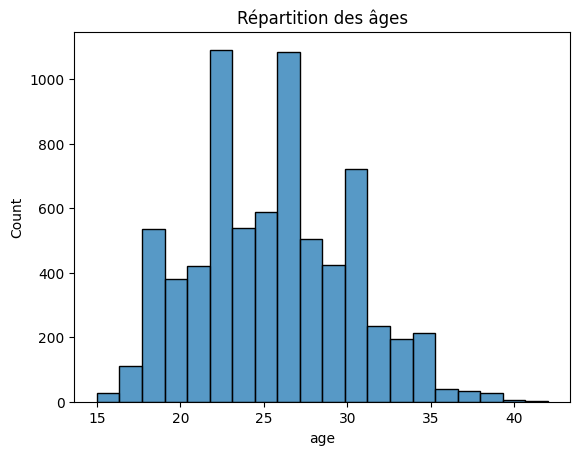

In [57]:
sns.histplot(df['age'], bins=20)
plt.title("Répartition des âges")
plt.show()

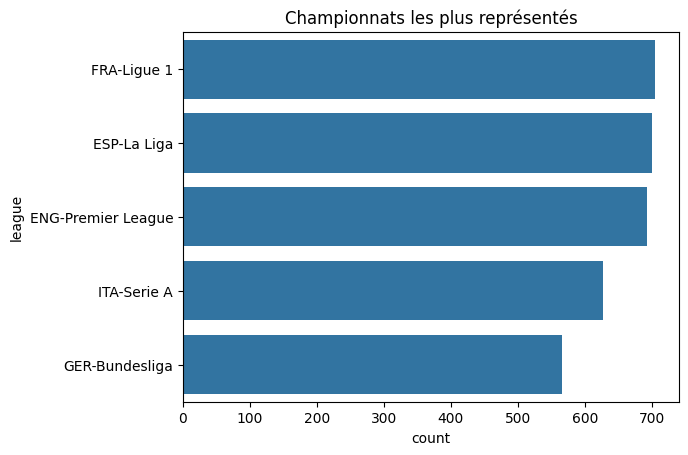

In [58]:
sns.countplot(y='league', data=df_final, order=df_final['league'].value_counts().index)
plt.title("Championnats les plus représentés")
plt.show()

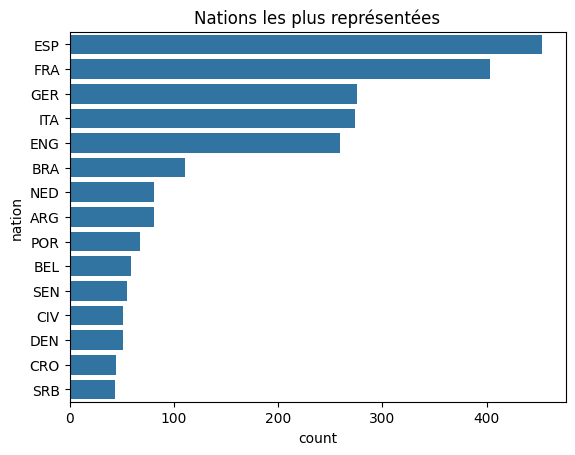

In [59]:
sns.countplot(y='nation', data=df_final, order=df_final['nation'].value_counts().index[:15])
plt.title("Nations les plus représentées")
plt.show()

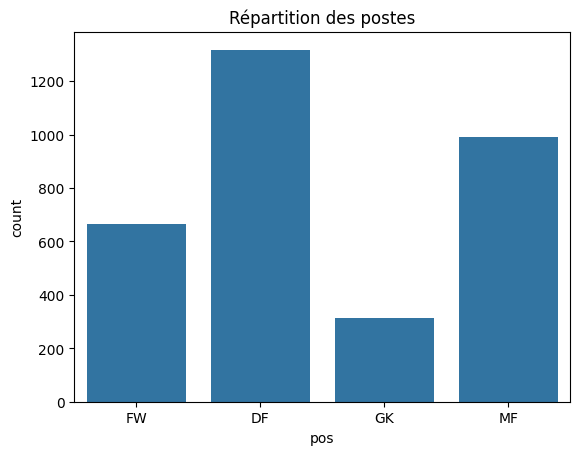

In [60]:
sns.countplot(x='pos', data=df_final)
plt.title("Répartition des postes")
plt.show()

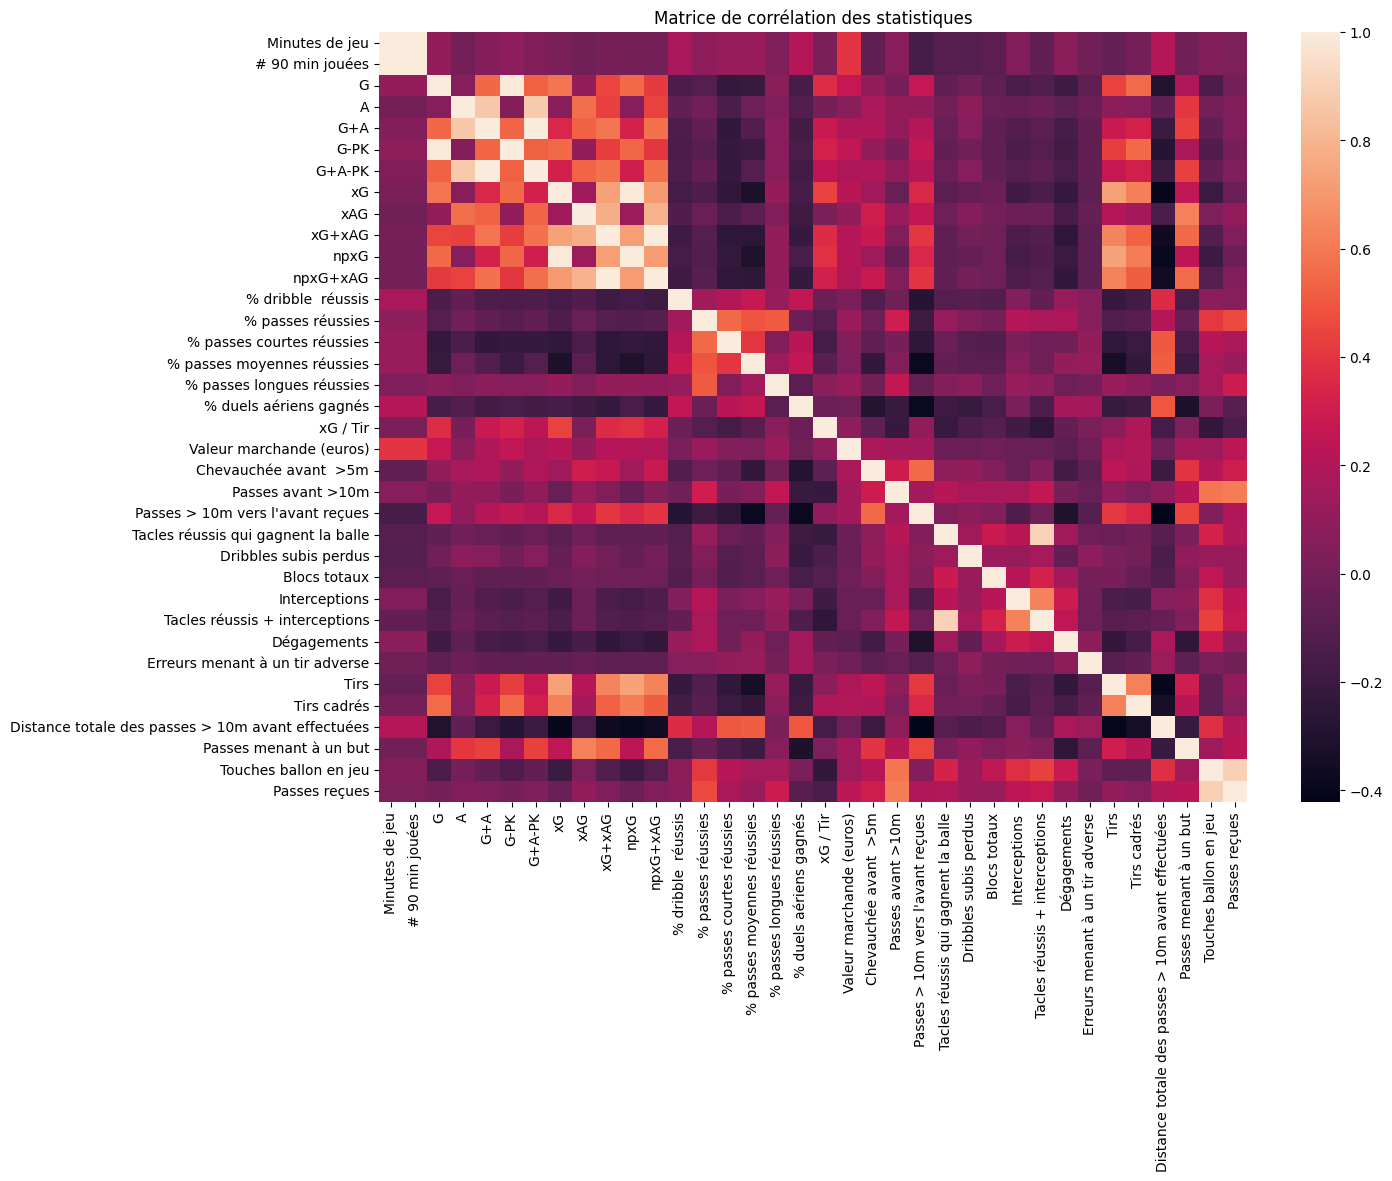

In [61]:
plt.figure(figsize=(14,10))
sns.heatmap(df_final[num_cols].corr(), annot=False)
plt.title("Matrice de corrélation des statistiques")
plt.show()

In [62]:
df_final[['player', 'Minutes de jeu']].sort_values(by='Minutes de jeu', ascending=False).head(15)

,player,Minutes de jeu
3127,Walter BenÃ­tez,3420.00
458,Bruno Ecuele Manga,3420.00
370,Baptiste Reynet,3420.00
3163,Wladimiro Falcone,3420.00
2133,Maxime DupÃ©,3420.00
326,Ashley Westwood,3410.00
2968,Thomas Kaminski,3405.00
419,Birama TourÃ©,3400.00
3247,Ãlex Remiro,3383.75
1644,Kasper Schmeichel,3360.00


In [63]:
df_final['decisif'] = df_final['G'] + df_final['Passes menant à un but']
df_final[['player', 'decisif']].sort_values(by='decisif', ascending=False).head(20)

,player,decisif
250,Ante Palaversa,14.783333
2208,Milutin OsmajiÄ‡,10.000000
276,Antonio Cioffi,10.000000
537,Christian KÃ¼hlwetter,10.000000
2768,Samuele Di Benedetto,10.000000
89,Alberto Soro,10.000000
2946,Theo Corbeanu,10.000000
2109,Mattia Pagliuca,10.000000
1030,Gabriel Vidovic,10.000000
415,Bilal Brahimi,10.000000


In [51]:
df_final.groupby('league')['age'].mean().sort_values()

,age
league,
FRA-Ligue 1,24.836879
ENG-Premier League,25.489884
GER-Bundesliga,25.515901
ITA-Serie A,25.939394
ESP-La Liga,26.340000


In [64]:
df_final.groupby('pos')['age'].mean()

,age
pos,
DF,25.915781
FW,24.838081
GK,28.594249
MF,24.817540


In [53]:

goals_cols = [c for c in df.columns if "but" in c.lower()]
print("Colonnes candidates :", goals_cols)

goals_col = goals_cols[0]  # on prend la première
print("Colonne utilisée :", repr(goals_col))

# Filtrer les clubs français
df_fr = df[df["league"].str.startswith("FRA-")]

# Trier
top10 = df_fr.sort_values(goals_col, ascending=False).head(10)

print(top10[["player", "team", goals_col]])

Colonnes candidates : ['Passes menant à un but ']
Colonne utilisée : 'Passes menant à un but '
                    player         team  Passes menant à un but 
8800         Bilal Brahimi         Nice                10.000000
8801         Bilal Brahimi         Nice                10.000000
8744          Hugo Ekitike    Paris S-G                10.000000
7539  Theocharis Tsingaras     Toulouse                10.000000
8027           Lovro Majer       Rennes                10.000000
5997        Ante Palaversa       Troyes                 6.666667
7510       Serhou Guirassy       Rennes                 6.666667
8736             Elye Wahi  Montpellier                 5.000000
6000      Antonin Bobichon       Angers                 5.000000
8735             Elye Wahi  Montpellier                 5.000000
